# Personal Tracker 2020

In [1]:
"""
Tracker:
1) Count number of Mouse samples
2) Count number of Acute Human samples
3) Count number of Culture Human samples
4) COunt number of 63x go vs no go
5) Date Range Tracker Mouse/Human

"""

'\nTracker:\n1) Count number of Mouse samples\n2) Count number of Acute Human samples\n3) Count number of Culture Human samples\n4) COunt number of 63x go vs no go\n5) Date Range Tracker Mouse/Human\n\n'

##### Imports

In [2]:
import os
import pandas as pd
import csv
import logging

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from temp_funcs import read_file, merge_dataframes, drop_cols, drop_nans, filter_date_range, \
filter_df, create_container_col, create_cond_df, create_container_df

In [4]:
sns.set(context = "notebook", style = "ticks", font="verdana", font_scale = 1.35)
pd.set_option("display.max_colwidth",150) #Expands the number of characters shown in the columns
pd.set_option('display.max_columns', None)

In [5]:
path = "C:/Users/kumar/Documents/Github/analysis_projects/"
csv_path = os.path.join(path, "csv/")
#excel_path = os.path.join(path, "excel/")
#plot_path = os.path.join(path, "plot/")

path_jem = os.path.join(csv_path, "jem_metadata.csv")

In [6]:
fields_jem = ["approach.creCell",
              "container",
              "date",
              "extraction.extractionNotes",
              "name",
              "organism_name",
              "rigOperator",
              "roi_major",
              "roi_minor",
              "status"]

In [7]:
def main():
    """
    Main output
    
    global variables: jem
    """
    
    global jem
    
    jem = read_file(path_jem, fields_jem)
    jem = filter_df(jem, "rigOperator", "ramr")
    jem = filter_date_range(jem, "date")

In [8]:
if __name__ == "__main__":
    main()

INFO:temp_funcs:Read file in as a pandas dataframe
INFO:temp_funcs:Filtered dataframe based on rigOperator == ramr
C:\Users\kumar\Documents\GitHub\analysis_projects\personal_tracker_project\temp_funcs.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.sort_values([date_col], inplace=True)
INFO:temp_funcs:Filtered dataframe: 2020-01-01 - 2020-12-31


In [9]:
jem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 10990 to 11754
Data columns (total 10 columns):
organism_name                 152 non-null object
name                          152 non-null object
approach.creCell              152 non-null object
date                          152 non-null object
extraction.extractionNotes    152 non-null object
rigOperator                   152 non-null object
status                        152 non-null object
roi_major                     152 non-null object
roi_minor                     152 non-null object
container                     152 non-null object
dtypes: object(10)
memory usage: 13.1+ KB


In [10]:
jem["date"] = jem["date"].str[:10]
jem["date"] = jem["date"].astype('datetime64[ns]')
jem["month"] = jem["date"].dt.strftime('%b')

In [11]:
jem

organism_name  \
10990         Mouse   
11004         Mouse   
11033         Mouse   
11034         Mouse   
11035         Mouse   
11036         Mouse   
11045         Mouse   
11046         Mouse   
11053         Mouse   
11052         Mouse   
11064         Mouse   
11068         Mouse   
11069         Mouse   
11070         Mouse   
11081         Mouse   
11078         Mouse   
11079         Mouse   
11080         Mouse   
11104         Mouse   
11102         Mouse   
11103         Mouse   
11110         Mouse   
11111         Mouse   
11112         Mouse   
11121         Human   
11122         Human   
11123         Human   
11128         Mouse   
11127         Mouse   
11129         Mouse   
...             ...   
11580         Mouse   
11591         Mouse   
11592         Mouse   
11593         Mouse   
11626         Mouse   
11627         Mouse   
11638         Mouse   
11639         Mouse   
11652         Human   
11651         Human   
11675         Mouse   
11676         Mouse   
11682         Mouse   
11685         Mouse   
11686         Mouse   
11694         Mouse   
11695         Mouse   
11707         Mouse   
11708         Mouse   
11712         Mouse   
11713         Mouse   
11720         Mouse   
11725         Mouse   
11727         Mouse   
11739         Mouse   
11738         Mouse   
11740         Mouse   
11748         Mouse   
11747         Mouse   
11754         Mouse   

                                                             name  \
10990                          Gad2-IRES-Cre;Ai14-504549.11.06.01   
11004                           Vip-IRES-Cre;Ai14-504182.08.01.01   
11033                       Slc32a1-IRES-Cre;Ai14-504560.08.02.04   
11034                       Slc32a1-IRES-Cre;Ai14-504560.08.02.02   
11035                       Slc32a1-IRES-Cre;Ai14-504560.08.02.03   
11036                       Slc32a1-IRES-Cre;Ai14-504560.08.02.01   
11045                   Sncg-IRES2-FlpO-neo;Ai65F-505713.08.01.01   
11046                   Sncg-IRES2-FlpO-neo;Ai65F-505713.08.01.02   
11053                         Rbp4-Cre_KL100;Ai14-506065.10.06.02   
11052                         Rbp4-Cre_KL100;Ai14-506065.10.06.01   
11064  Penk-IRES2-Cre-neo;Slc17a6-IRES2-FlpO-505762-Ai65.09.01.01   
11068                        Htr3a-Cre_NO152;Ai14-506092.09.06.04   
11069                        Htr3a-Cre_NO152;Ai14-506092.09.06.02   
11070                        Htr3a-Cre_NO152;Ai14-506092.09.06.01   
11081                         Esr2-IRES2-Cre;Ai14-506384.04.02.01   
11078                         Esr2-IRES2-Cre;Ai14-506384.04.02.03   
11079                         Esr2-IRES2-Cre;Ai14-506384.04.02.04   
11080                         Esr2-IRES2-Cre;Ai14-506384.04.02.02   
11104                      Slc17a7-IRES2-Cre;Ai14-506270.10.06.02   
11102                      Slc17a7-IRES2-Cre;Ai14-506270.10.06.03   
11103                      Slc17a7-IRES2-Cre;Ai14-506270.10.06.01   
11110                         Esr2-IRES2-Cre;Ai14-506385.05.02.02   
11111                         Esr2-IRES2-Cre;Ai14-506385.05.02.01   
11112                         Esr2-IRES2-Cre;Ai14-506385.05.02.03   
11121                                      H20.26.401.12.03.01.03   
11122                                      H20.26.401.12.03.01.04   
11123                                      H20.26.401.12.03.01.02   
11128                         Esr2-IRES2-Cre;Ai14-506389.04.02.02   
11127                         Esr2-IRES2-Cre;Ai14-506389.04.02.03   
11129                         Esr2-IRES2-Cre;Ai14-506389.04.02.01   
...                                                           ...   
11580                       Slc32a1-IRES-Cre;Ai14-511089.08.02.01   
11591                           Sst-IRES-Cre;Ai14-510711.10.06.03   
11592                           Sst-IRES-Cre;Ai14-510711.10.06.01   
11593                           Sst-IRES-Cre;Ai14-510711.10.06.02   
11626                       Slc32a1-IRES-Cre;Ai14-511086.09.06.03   
11627                     

In [12]:
jem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 10990 to 11754
Data columns (total 11 columns):
organism_name                 152 non-null object
name                          152 non-null object
approach.creCell              152 non-null object
date                          152 non-null datetime64[ns]
extraction.extractionNotes    152 non-null object
rigOperator                   152 non-null object
status                        152 non-null object
roi_major                     152 non-null object
roi_minor                     152 non-null object
container                     152 non-null object
month                         152 non-null object
dtypes: datetime64[ns](1), object(10)
memory usage: 14.2+ KB


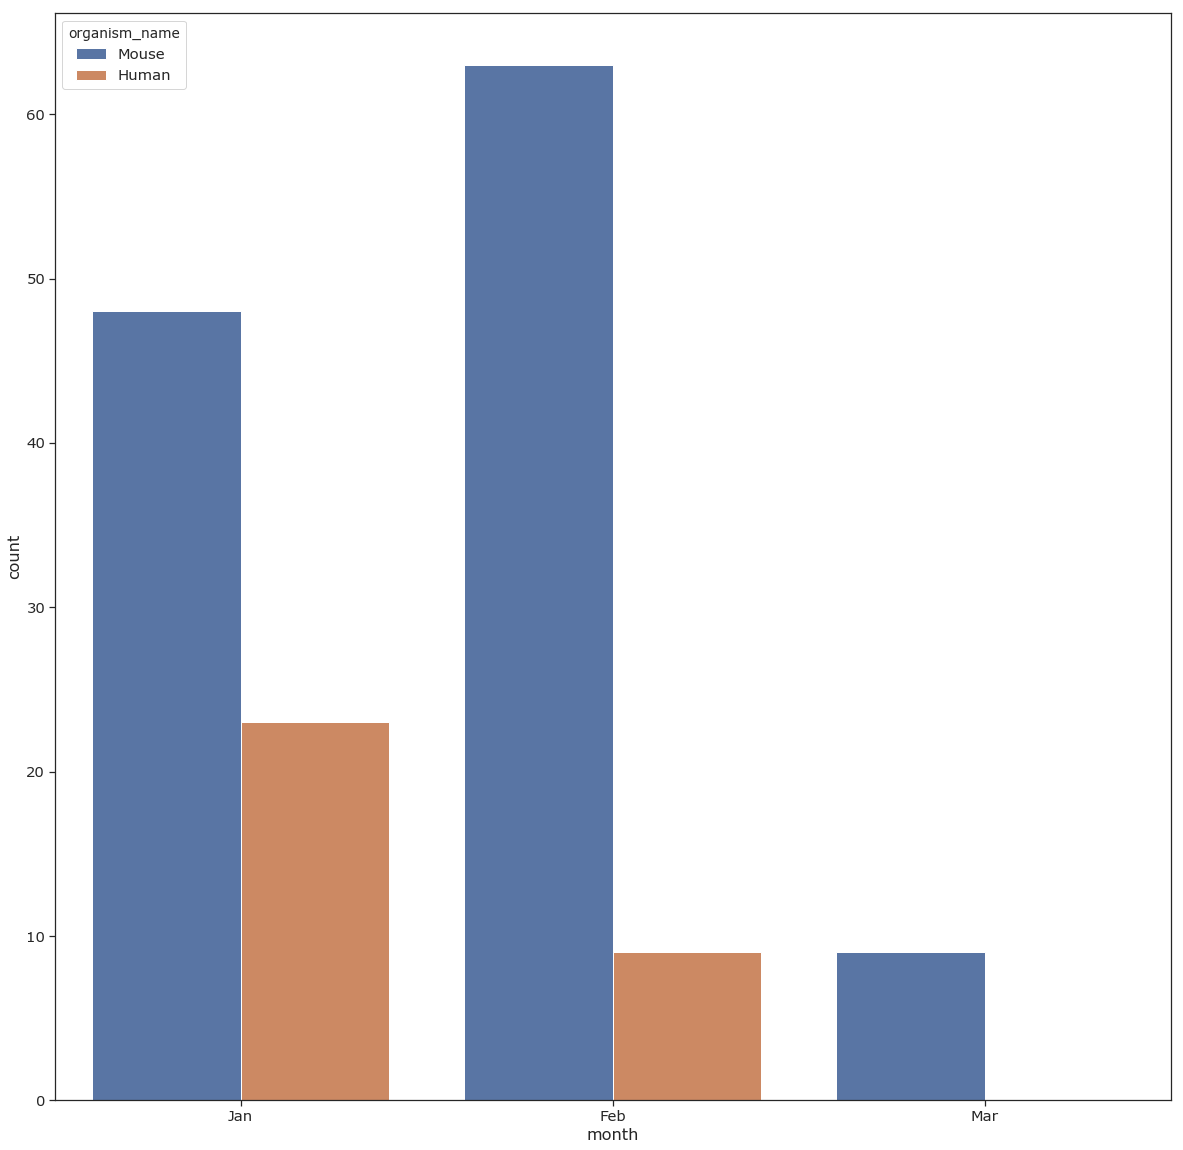

In [13]:
f, axes = plt.subplots(figsize=(20, 20))
sns.countplot(x="month", data=jem, hue="organism_name")

TypeError: unsupported operand type(s) for +: 'Timestamp' and 'str'

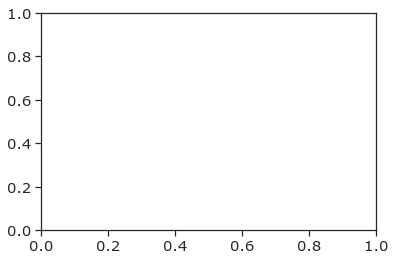

In [14]:
sns.distplot(jem)

In [ ]:
org_jem = jem[["date", "organism_name", "name", "container", "rigOperator", "status",
              "approach.creCell", "roi_major", "roi_minor", "extraction.extractionNotes"]]